In [1]:
from utils_excel import read_log_databaseloader as databaseloader
import numpy as np
from utils_calculation import calculator

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# check_line_list = [163,183,3,63,83,103,23,43,207,227,247,267,287,143,123]
check_line_list = [3,23,43,63,83,103,123,143,163,195]
plt_hight = 4.5
bar_width = 0.4
save_root_path = 'statistics_pruned_quantized_models/'
rld = databaseloader(file_path='../log/arc3_quantization_pruning_model_compare.xls')
c = calculator()
x_lable = ['resnet50_float', 'resnet50_pruning_0.2_remain', 'resnet50_pruning_0.4_remain', 'resnet50_pruning_0.6_remain', 'resnet50_pruning_0.7_remain', 'resnet50_quantization', 'resnet50_0.2_remain_quantization', 'resnet50_0.4_remain_quantization', 'resnet50_0.6_remain_quantization', 'resnet50_0.7_remain_quantization']


In [2]:
def modelpath2modelname(model_path):  #transform float32 model path to model name
    if model_path == '../quantization_models/inception_v3.pth':
        model_name = 'inception_v3_quantization'
    else:
        model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]
    return model_name

In [3]:
def get_cuda_memory_usage_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_model_cuda_memory_usage,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['resnet50_pretrained_float.pt', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50_quantization', 'sketch_resnet50_0.2_quantization', 'sketch_resnet50_0.4_quantization', 'sketch_resnet50_0.6_quantization', 'sketch_resnet50_0.7_quantization']
[1016.88983, 989.95233, 1028.4344, 1082.3094, 1115.0192, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.1368683772161603e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1016.8898283935941, 989.9523494957506, 1028.4344622069557, 1082.3094200026428, 1115.019215807167, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.1368683772161603e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


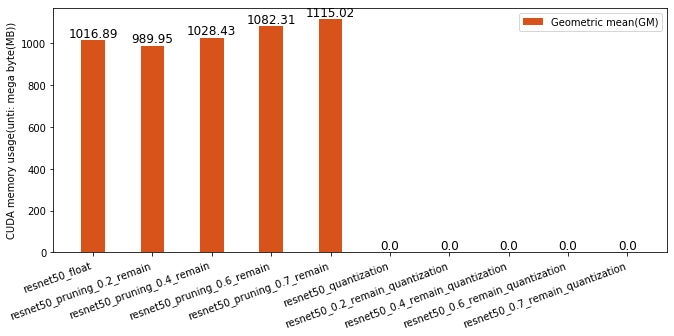

In [4]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_cuda_memory_usage_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,plt_hight))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 2), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='upper right')

plt.ylabel('CUDA memory usage(unti: mega byte(MB))')
plt.savefig(save_root_path + "CUDA memory usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [5]:
def get_host_memory_usage_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_model_host_memory_usage,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['resnet50_pretrained_float.pt', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50_quantization', 'sketch_resnet50_0.2_quantization', 'sketch_resnet50_0.4_quantization', 'sketch_resnet50_0.6_quantization', 'sketch_resnet50_0.7_quantization']
[2203.8032, 2210.3281, 2211.0754, 2216.546, 2217.1995, 45.53301, 26.616602, 32.458202, 39.652813, 44.61543]
[1.1918703221244868, 1.1586701500327763, 1.127501861192286, 1.4959161759475137, 2.011123437239803, 0.015817496522863905, 0.45455187973195166, 0.6099252168719858, 0.4121115069026402, 0.361641786738808]
[2203.801059044146, 2210.325996199477, 2211.073374250061, 2216.542359377798, 2217.1930102397473, 45.53298853420408, 26.587939576236494, 32.414532159174506, 39.63331016220406, 44.6048165202308]
[1.252939500084267, 1.2180382140541042, 1.1852729211245787, 1.572564087608498, 2.1141695931910363, 0.01662795508710957, 0.4778422571496215, 0.6411766298149466, 0.42865467208225283, 0.3801716269588

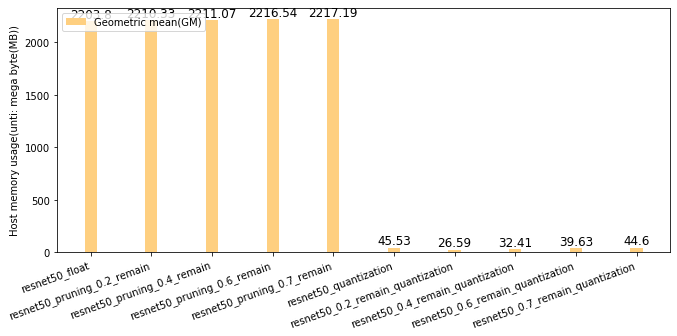

In [6]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_host_memory_usage_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1, plt_hight))

bar_width = 0.2
bar = plt.bar(x, model_geo_mean_list, bar_width, color=(255/256, 208/256, 128/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 2), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='upper left')

plt.ylabel('Host memory usage(unti: mega byte(MB))')
plt.savefig(save_root_path + "Host memory usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [7]:
def get_storage_usage(estimate_line_list = []):# need to fill up all the size parameters
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_size,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['resnet50_pretrained_float.pt', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50_quantization', 'sketch_resnet50_0.2_quantization', 'sketch_resnet50_0.4_quantization', 'sketch_resnet50_0.6_quantization', 'sketch_resnet50_0.7_quantization']
[97.7, 54.9, 79.5, 111.0, 129.0, 24.78, 7.18, 10.27, 14.23, 16.54]
[0.0, 0.0, 0.0, 0.0, 0.0, 3.552713678800501e-15, 8.881784197001252e-16, 0.0, 0.0, 0.0]
[97.70000000000003, 54.90000000000001, 79.50000000000001, 111.00000000000003, 129.00000000000003, 24.780000000000005, 7.180000000000001, 10.270000000000001, 14.23, 16.540000000000003]
[0.0, 0.0, 0.0, 0.0, 0.0, 3.552713678800501e-15, 8.881784197001252e-16, 0.0, 0.0, 0.0]


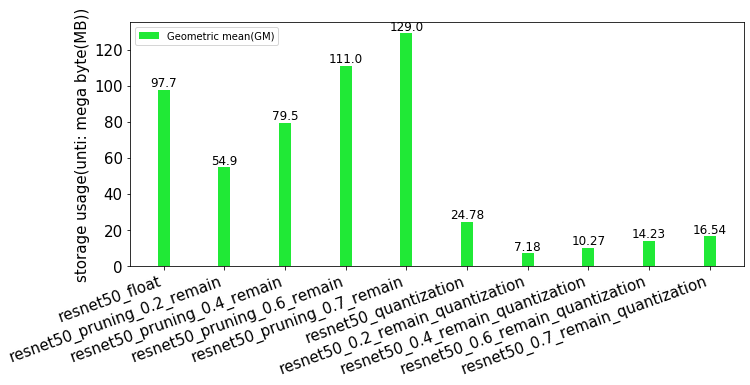

In [8]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_storage_usage(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,plt_hight))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(32/256, 234/256, 54/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='upper left')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('storage usage(unti: mega byte(MB))',fontsize = 15)
plt.savefig(save_root_path + "storage usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

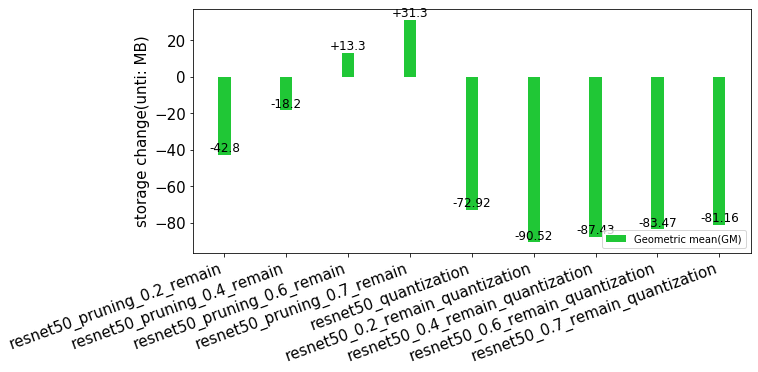

In [9]:
#  storage save compare with ResNet50_float
x_loss_lable = x_lable[1:]
x = np.arange(0,len(x_loss_lable))
plt.figure(figsize=(len(x_loss_lable)+1,plt_hight))
resnet50_float_accuarcy = model_geo_mean_list[0]
resnet50_loss_accuracy = np.array(model_geo_mean_list[1:]) - resnet50_float_accuarcy
bar = plt.bar(x, resnet50_loss_accuracy, bar_width, color=(32/256, 200/256, 54/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_loss_lable, resnet50_loss_accuracy):
    if b > 0:
        plt.text(x_axis, b+0.0015, '+' + str(round(b, 4)), ha='center', va='bottom', fontsize=12)
    else:
        plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=20)
plt.xticks(x,x_loss_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='lower right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('storage change(unti: MB)', fontsize = 15)
plt.savefig(save_root_path + "storage change.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [10]:
def get_inference_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Inference_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['resnet50_pretrained_float.pt', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50_quantization', 'sketch_resnet50_0.2_quantization', 'sketch_resnet50_0.4_quantization', 'sketch_resnet50_0.6_quantization', 'sketch_resnet50_0.7_quantization']
[0.3359144, 0.33882836, 0.33468914, 0.33680376, 0.33448085, 0.43415016, 0.35773554, 0.36375725, 0.40536788, 0.40537256]
[0.0027825141921564156, 0.0018916004164926115, 0.0013851760013192105, 0.004848855392010132, 0.0019045332832142714, 0.0892503416984759, 0.009867007099966352, 0.006800061001450475, 0.03256035980081817, 0.03463846281926358]
[0.3358364302616393, 0.338791763333723, 0.3346690772191903, 0.3365709477734999, 0.33444303909809925, 0.4038187914960598, 0.3568408415365748, 0.36331790844945067, 0.3967017031915162, 0.3973826762369699]
[0.0029250849494120157, 0.00198852243923181, 0.0014561497961688707, 0.0050973015587935655, 0.0020021179615500873, 0.0938233601711731, 0.010372573856123113,

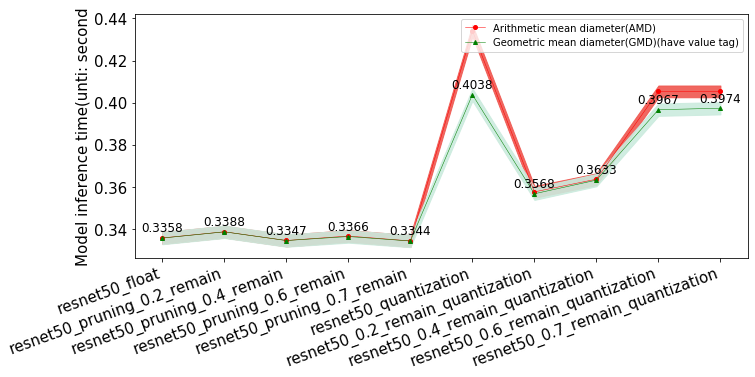

In [11]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_inference_time(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,plt_hight))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Model inference time(unti: second', fontsize = 15)
plt.savefig(save_root_path + "Model inference time.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [12]:
def get_running_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_running_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['resnet50_pretrained_float.pt', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50_quantization', 'sketch_resnet50_0.2_quantization', 'sketch_resnet50_0.4_quantization', 'sketch_resnet50_0.6_quantization', 'sketch_resnet50_0.7_quantization']
[664.1389, 1041.2643, 945.49133, 771.47394, 750.7367, 917.46826, 949.4988, 1088.314, 1237.4225, 1264.4855]
[23.68143269022096, 64.18970425554994, 51.97098063286114, 15.597958711691376, 21.664212708007085, 52.46708273251386, 4.757327744371196, 32.35552077430043, 79.95853669593339, 96.07058325043522]
[661.3772854846867, 1027.5005430826704, 935.5983315854479, 770.3485687839595, 748.5500021275964, 907.1653074299916, 949.4155493461167, 1084.9653165168447, 1217.459477599392, 1241.8541247708308]
[24.894824449752605, 67.47866312933559, 54.633875249905714, 16.39716857428118, 22.774245936169564, 55.155396681550656, 5.00108420783863, 34.01335637894704, 83.16826818346954, 100.99305798303931]


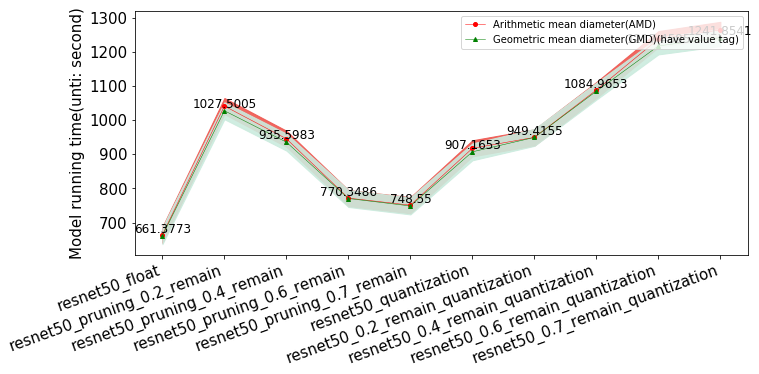

In [13]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_running_time(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,plt_hight))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Model running time(unti: second)', fontsize = 15)
plt.savefig(save_root_path + "Model running time.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [14]:
def get_Top1_accuracy_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Top1_Accuracy,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['resnet50_pretrained_float.pt', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50_quantization', 'sketch_resnet50_0.2_quantization', 'sketch_resnet50_0.4_quantization', 'sketch_resnet50_0.6_quantization', 'sketch_resnet50_0.7_quantization']
[76.13, 69.378, 72.912, 74.58, 75.204, 75.77, 68.932, 72.696, 74.288, 74.958]
[1.4210854715202004e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[76.13000000000001, 69.37800000000001, 72.91200000000002, 74.58000000000001, 75.20400000000001, 75.77000000000001, 68.93200000000002, 72.69600000000001, 74.288, 74.95800000000001]
[1.4210854715202004e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


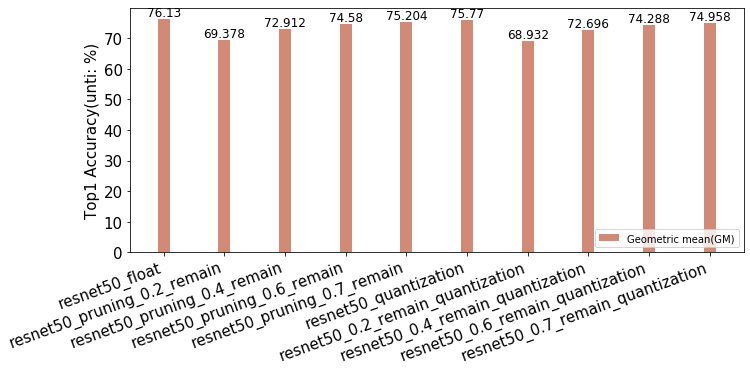

In [15]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_Top1_accuracy_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,plt_hight))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(210/256, 139/256, 118/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='lower right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Top1 Accuracy(unti: %)',fontsize = 15)
plt.savefig(save_root_path + "Top1 Accuracy.png",dpi=500,bbox_inches = 'tight')
plt.show()

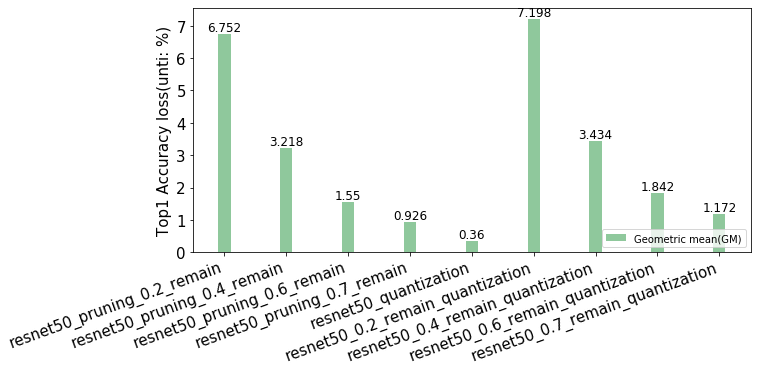

In [16]:
# TOP-1 accuracy loss compare with ResNet50_float
x_loss_lable = x_lable[1:]
x = np.arange(0,len(x_loss_lable))
plt.figure(figsize=(len(x_loss_lable)+1,plt_hight))
resnet50_float_accuarcy = model_geo_mean_list[0]
resnet50_loss_accuracy = resnet50_float_accuarcy - np.array(model_geo_mean_list[1:])
bar = plt.bar(x, resnet50_loss_accuracy, bar_width, color=(144/256, 201/256, 157/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_loss_lable, resnet50_loss_accuracy):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=20)
plt.xticks(x,x_loss_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='lower right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Top1 Accuracy loss(unti: %)',fontsize = 15)
plt.savefig(save_root_path + "Top1 Accuracy loss.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [17]:
def get_Top5_accuracy_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Top5_Accuracy,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['resnet50_pretrained_float.pt', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50_quantization', 'sketch_resnet50_0.2_quantization', 'sketch_resnet50_0.4_quantization', 'sketch_resnet50_0.6_quantization', 'sketch_resnet50_0.7_quantization']
[92.862, 89.156, 91.112, 92.174, 92.396, 92.878, 88.972, 91.006, 92.078, 92.34]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[92.86200000000002, 89.15600000000003, 91.11200000000002, 92.17400000000004, 92.39600000000002, 92.87800000000003, 88.97200000000002, 91.00600000000003, 92.07800000000002, 92.34000000000003]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


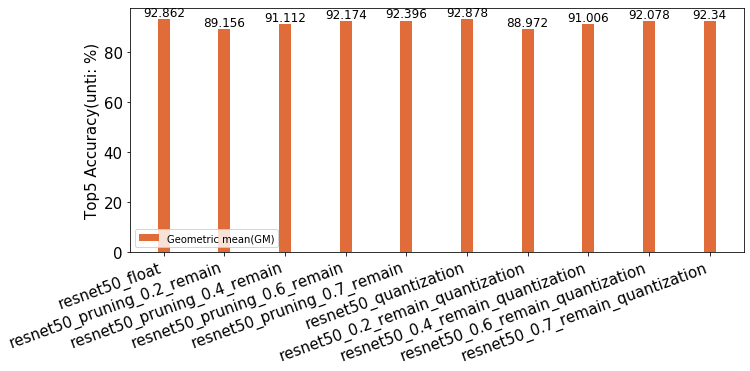

In [18]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_Top5_accuracy_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,plt_hight))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(225/256, 108/256, 57/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='lower left')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Top5 Accuracy(unti: %)', fontsize = 15)
plt.savefig(save_root_path + "Top5 Accuracy.png",dpi=500,bbox_inches = 'tight')
plt.show()

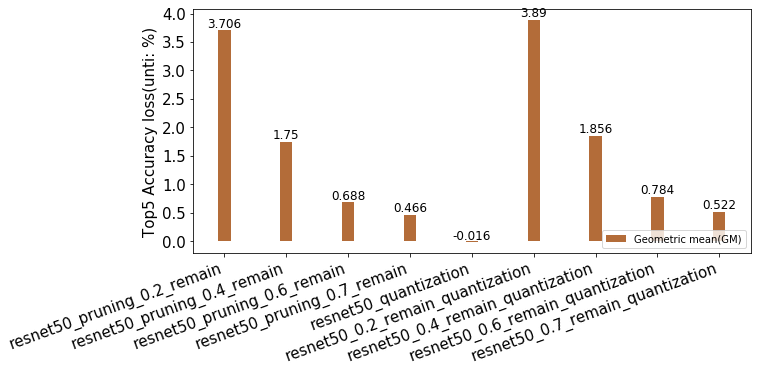

In [19]:
# TOP-5 accuracy loss compare with ResNet50_float
x_loss_lable = x_lable[1:]
x = np.arange(0,len(x_loss_lable))
plt.figure(figsize=(len(x_loss_lable)+1,plt_hight))
resnet50_float_accuarcy = model_geo_mean_list[0]
resnet50_loss_accuracy = resnet50_float_accuarcy - np.array(model_geo_mean_list[1:])
bar = plt.bar(x, resnet50_loss_accuracy, bar_width, color=(180/256, 108/256, 57/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_loss_lable, resnet50_loss_accuracy):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=20)
plt.xticks(x,x_loss_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='lower right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Top5 Accuracy loss(unti: %)',fontsize = 15)
plt.savefig(save_root_path + "Top5 Accuracy loss.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [20]:
def get_crossentropy_loss_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_cross_entropy_loss,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['resnet50_pretrained_float.pt', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50_quantization', 'sketch_resnet50_0.2_quantization', 'sketch_resnet50_0.4_quantization', 'sketch_resnet50_0.6_quantization', 'sketch_resnet50_0.7_quantization']
[0.00482849, 0.00618194, 0.00541265, 0.00506431, 0.00493012, 0.00486734, 0.00625342, 0.005454598, 0.00510892, 0.00495665]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5094212078153868e-09, 0.0, 8.673617379884035e-19]
[0.004828489999999999, 0.006181939999999999, 0.005412649999999998, 0.005064309999999998, 0.004930119999999998, 0.004867339999999999, 0.006253419999999998, 0.005454597999998532, 0.0051089199999999994, 0.004956649999999998]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5867610914446773e-09, 0.0, 8.673617379884035e-19]


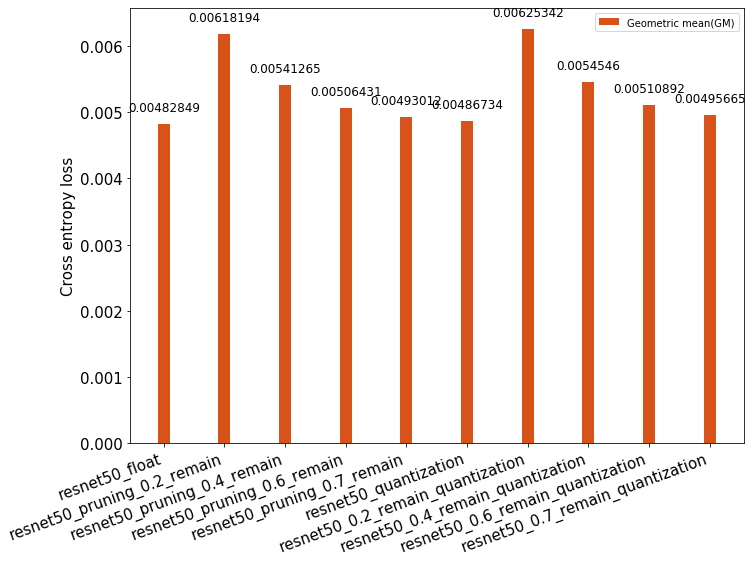

In [21]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_crossentropy_loss_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,8))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.00015, round(b, 8), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='upper right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Cross entropy loss', fontsize = 15)
plt.savefig(save_root_path +"Cross entropy loss.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [22]:
def get_f1_score(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        a = rld.read_line_vector(rld.read_F1_score,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['resnet50_pretrained_float.pt', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50_quantization', 'sketch_resnet50_0.2_quantization', 'sketch_resnet50_0.4_quantization', 'sketch_resnet50_0.6_quantization', 'sketch_resnet50_0.7_quantization']
[0.7583254, 0.689938, 0.7259277, 0.7427464, 0.7494368, 0.7546544, 0.6867981, 0.7236741, 0.7398953, 0.7471714]
[0.0016758524967381838, 0.001824822334220877, 0.0017412072001776746, 0.0016946535008388608, 0.0017029995595574388, 0.0016859281747946264, 0.0018171160046579482, 0.0017480081532417202, 0.0015284848880338098, 0.0017020564341126976]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0016759301285406611, 0.0018249068668674952, 0.0017412878594561866, 0.0016947320035746484, 0.0017030784489141186, 0.0016860062733404472, 0.0018172001803183542, 0.0017480891275661074, 0.0015285415310829391, 0.001702135279780213]


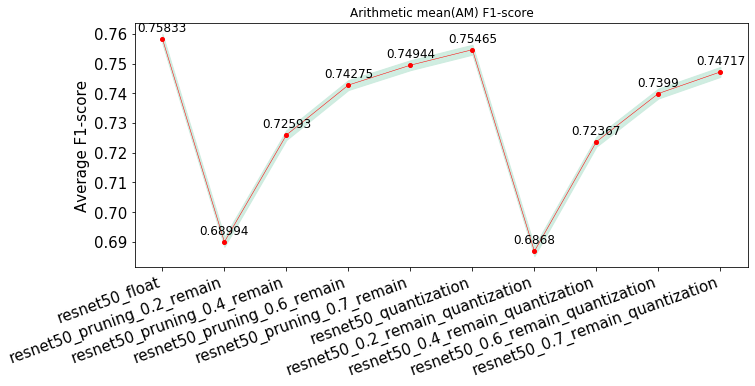

In [23]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_f1_score(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,plt_hight))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 5), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

# plt.legend([line1], ["Arithmetic mean(AM)"], loc='upper right')
plt.title("Arithmetic mean(AM) F1-score")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Average F1-score', fontsize = 15)
plt.savefig(save_root_path + "Average F1-score.png",dpi=500,bbox_inches = 'tight')
plt.show()

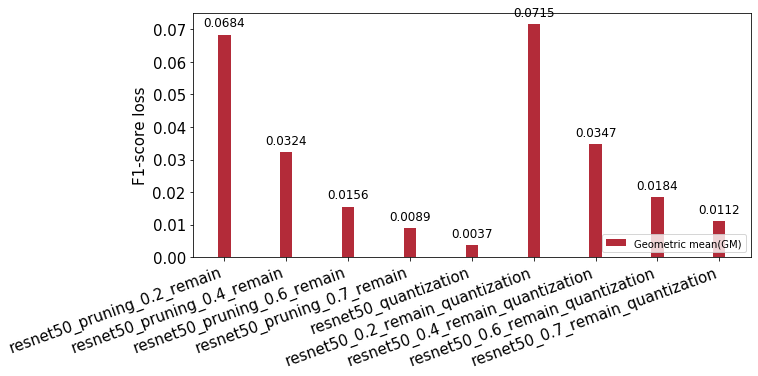

In [24]:
# F1-score loss compare with ResNet50_float
x_loss_lable = x_lable[1:]
x = np.arange(0,len(x_loss_lable))
plt.figure(figsize=(len(x_loss_lable)+1,plt_hight))
resnet50_float_accuarcy = model_mean_list[0]
resnet50_loss_accuracy = resnet50_float_accuarcy - np.array(model_mean_list[1:])
bar = plt.bar(x, resnet50_loss_accuracy, bar_width, color=(180/256, 43/256, 57/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_loss_lable, resnet50_loss_accuracy):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=20)
plt.xticks(x,x_loss_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='lower right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('F1-score loss', fontsize = 15)
plt.savefig(save_root_path + "F1-score loss.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [25]:
def get_precision_score(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        a = rld.read_line_vector(rld.read_precision,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

In [26]:
def get_recall(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        a = rld.read_line_vector(rld.read_recall,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

[0.7613, 0.69378, 0.72912, 0.7458, 0.75204, 0.7578, 0.69072, 0.72678, 0.74294, 0.74984]
[0.7655472, 0.6969834, 0.7322989, 0.7485525, 0.7550905, 0.7621657, 0.6940338, 0.7302559, 0.7460997, 0.7530696]
[0.0019029487995879668, 0.0020515771841611574, 0.0019457938829620103, 0.0019087570170472912, 0.0018894621243557008, 0.0019195562302898317, 0.0020544821555046333, 0.0019536486198880043, 0.0017215717882854698, 0.0018985240384015167]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0019030369513468929, 0.0020516722209468334, 0.0019458840194665655, 0.001908845437864725, 0.0018895496513609664, 0.0019196451513674888, 0.002054577326859595, 0.001953739120253628, 0.001721635586806606, 0.0018986119851887935]


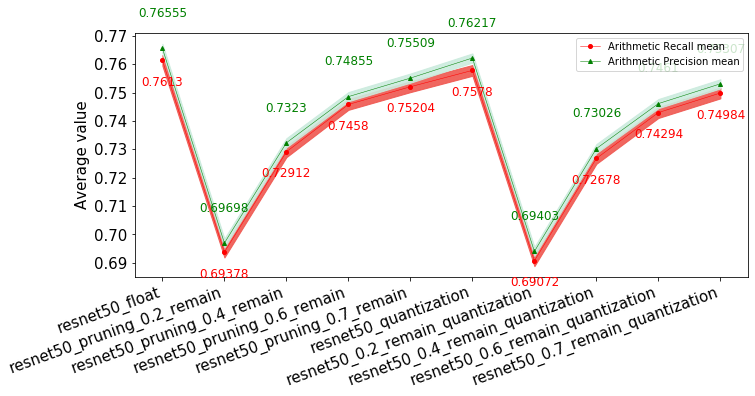

In [27]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_recall(check_line_list)
model_name_list1, model_mean_list1, model_mean_confinterval1, model_geo_mean_list1, model_geo_mean_confinterval1 = get_precision_score(check_line_list)

print(model_mean_list)
print(model_mean_list1)

print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,plt_hight))

# line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)

# plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)


line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_mean_list1, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_mean_list1 - model_mean_confinterval1[0], model_mean_list1 + model_mean_confinterval1[0], color=(204/256, 236/256, 223/256), alpha=0.9)


#show the bar spesific number
for x_axis, a, b, c in zip(x, x_lable, model_mean_list, model_mean_list1):
    plt.text(x_axis, b-0.01, round(b, 5), ha='center', va='bottom', fontsize=12, color='red')
    plt.text(x_axis, c+0.01, round(c, 5), ha='center', va='bottom', fontsize=12, color='green')


plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([line1,line2], ["Arithmetic Recall mean", "Arithmetic Precision mean"], loc='down right')
# plt.title("Arithmetic mean(AM) Recall")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Average value', fontsize = 15)
plt.savefig(save_root_path + "Average Recall and Precision.png",dpi=500,bbox_inches = 'tight')
plt.show()

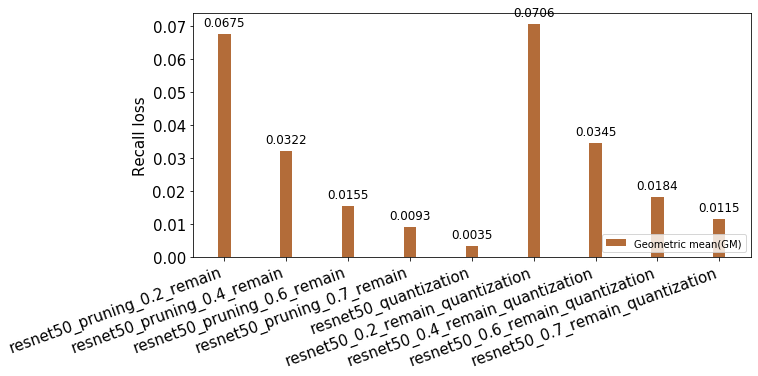

In [28]:
# Recall loss compare with ResNet50_float
x_loss_lable = x_lable[1:]
x = np.arange(0,len(x_loss_lable))
plt.figure(figsize=(len(x_loss_lable)+1,plt_hight))
resnet50_float_accuarcy = model_mean_list[0]
resnet50_loss_accuracy = resnet50_float_accuarcy - np.array(model_mean_list[1:])

bar = plt.bar(x, resnet50_loss_accuracy, bar_width, color=(180/256, 108/256, 57/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_loss_lable, resnet50_loss_accuracy):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=20)
plt.xticks(x,x_loss_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='lower right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Recall loss', fontsize = 15)
plt.savefig(save_root_path + "Recall loss.png",dpi=500,bbox_inches = 'tight')
plt.show()

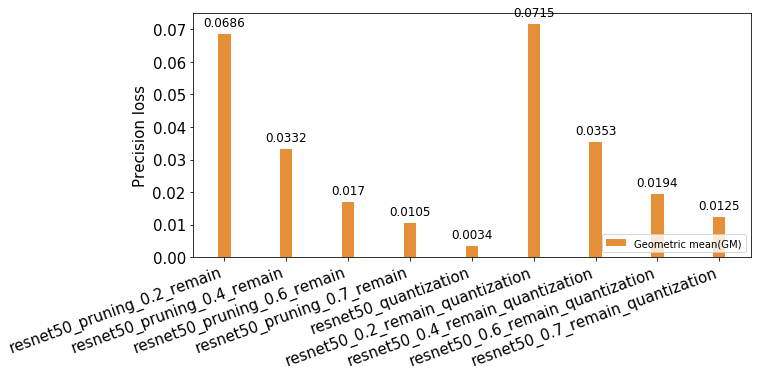

In [29]:
# Precision loss compare with ResNet50_float
x_loss_lable = x_lable[1:]
x = np.arange(0,len(x_loss_lable))
plt.figure(figsize=(len(x_loss_lable)+1,plt_hight))
resnet50_float_accuarcy = model_mean_list1[0]
resnet50_loss_accuracy = resnet50_float_accuarcy - np.array(model_mean_list1[1:])
bar = plt.bar(x, resnet50_loss_accuracy, bar_width, color=(230/256, 145/256, 57/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_loss_lable, resnet50_loss_accuracy):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=20)
plt.xticks(x,x_loss_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='lower right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Precision loss', fontsize = 15)
plt.savefig(save_root_path + "Precision loss.png",dpi=500,bbox_inches = 'tight')
plt.show()